In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [58]:
np.random.seed(60)
N = 15
X = np.random.uniform(0, 2, size=(N, 1)) 
Y = np.sin(2 * np.pi * X) + 2 * np.cos(X - 1.5) + np.random.normal(0, 0.3, size=(N, 1)) 

print(X.shape, Y.shape)

(15, 1) (15, 1)


In [59]:
X_poly = PolynomialFeatures(degree = 3).fit_transform(X) 
model = LinearRegression().fit(X_poly, Y)
model.coef_

array([[ 0.        , -2.29316458,  4.20540373, -1.50747767]])

In [60]:
def get_poly(M:int): 
    X_poly = PolynomialFeatures(degree = M).fit_transform(X) 
    model = LinearRegression().fit(X_poly, Y)

    # plot dataset 
    plt.scatter(X.reshape(-1), Y.reshape(-1), c="b", s=3, label="Dataset")  

    # plot true function 
    domain1 = np.linspace(0, 2, 100)
    range1 = np.sin(2 * np.pi * domain1) + 2 * np.cos(domain1 - 1.5)
    plt.plot(domain1, range1, c="r", linewidth=2, label="True Function")

    # plot estimated function 
    domain2 = np.linspace(0, 2, 100).reshape(-1, 1) 
    domain2_poly = PolynomialFeatures(degree=M).fit_transform(domain2)
    range2 = model.predict(domain2_poly) 
    plt.plot(domain2.reshape(-1), range2)
    
    plt.legend() 
    plt.savefig(f"poly_{M}_fit.png")
    plt.clf()

In [61]:
get_poly(9)

<Figure size 640x480 with 0 Axes>

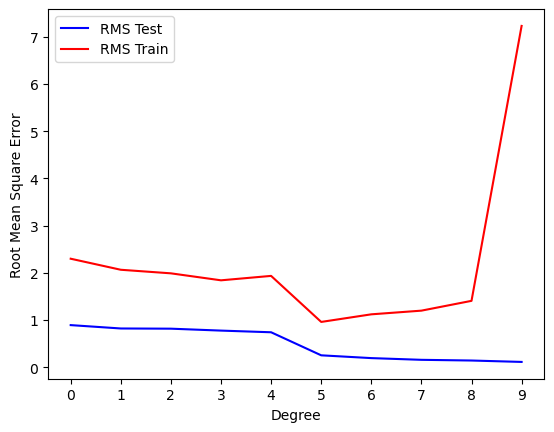

In [62]:
# Plot Degree vs RMS 

newX = np.random.uniform(0, 2, size=(100, 1)) 
newY = np.sin(2 * np.pi * newX) + 2 * np.cos(newX - 1.5) + np.random.normal(0, 0.3, size=(100, 1)) 

RMS_train = []
RMS_test = []

for degree in range(0, 10): 
    X_poly = PolynomialFeatures(degree = degree).fit_transform(X) 
    model = LinearRegression().fit(X_poly, Y) 
    
    newX_poly = PolynomialFeatures(degree = degree).fit_transform(newX) 
    
    rms_train = np.sqrt(np.sum(np.square(model.predict(X_poly) - Y)) / N)
    rms_test = np.sqrt(np.sum(np.square(model.predict(newX_poly) - newY)) / N)
    RMS_train.append(rms_train)
    RMS_test.append(rms_test)
    
    
plt.plot(np.arange(0, 10), RMS_train, c="b", label="RMS Test")
plt.plot(np.arange(0, 10), RMS_test, c="r", label="RMS Train")
plt.legend() 
plt.xticks(np.arange(0, 10))
plt.xlabel("Degree")
plt.ylabel("Root Mean Square Error")
plt.savefig("Degree_vs_RMS.png")
plt.show() 


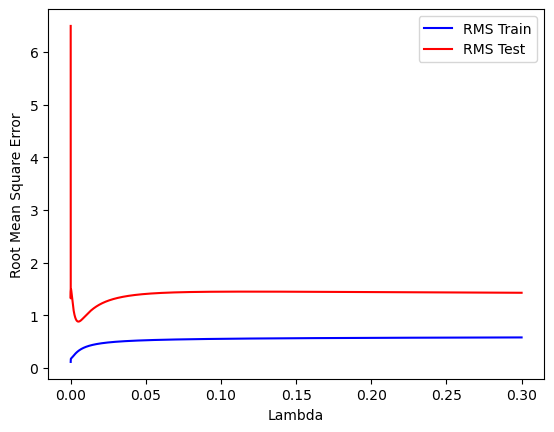

In [76]:
from sklearn.linear_model import Ridge 

newX = np.random.uniform(0, 2, size=(100, 1)) 
newY = np.sin(2 * np.pi * newX) + 2 * np.cos(newX - 1.5) + np.random.normal(0, 0.3, size=(100, 1)) 

RMS_train = [] 
RMS_test = []

for lbda in np.linspace(0, 0.05, 10000): 
    X_poly = PolynomialFeatures(degree = 9).fit_transform(X) 
    model = Ridge(alpha=lbda).fit(X_poly, Y) 
    
    newX_poly = PolynomialFeatures(degree = 9).fit_transform(newX) 
    
    rms_train = np.sqrt(( np.sum(np.square(model.predict(X_poly) - Y)))  / N)
    rms_test = np.sqrt((np.sum(np.square(model.predict(newX_poly) - newY)))  / N)
    RMS_train.append(rms_train)
    RMS_test.append(rms_test)
    
    
plt.plot(np.linspace(0, 0.3, 10000), RMS_train, c="b", label="RMS Train")
plt.plot(np.linspace(0, 0.3, 10000), RMS_test, c="r", label="RMS Test")
plt.legend() 
plt.xlabel("Lambda")
plt.ylabel("Root Mean Square Error")
plt.savefig("Lambda_vs_RMS.png")
plt.show() 

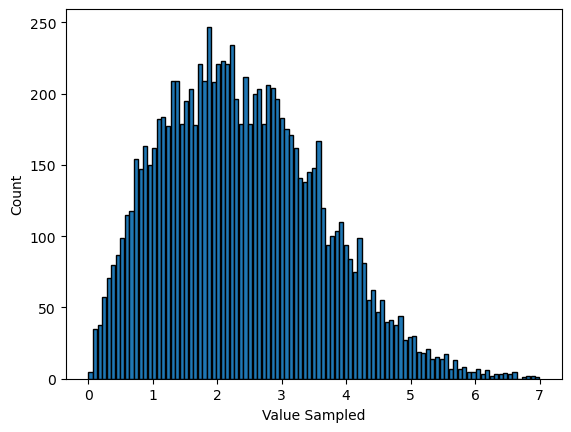

[2.93175835 4.56436254 2.03623342 ... 0.72449576 1.47305724 3.80770536]
2.3839142787371306


In [33]:
def variance(x:np.ndarray): 
    x_bar = np.mean(x) 
    
    return 0.2 * np.sum(np.square(x - x_bar))


samples = np.random.uniform(-2, 4, size=(10000, 5))
variances = np.apply_along_axis(variance, 1, samples)

plt.hist(variances, 
         bins=np.linspace(0, 7, 100),
         edgecolor="black", 
         rwidth=0.9)
plt.xlabel("Value Sampled")
plt.ylabel("Count")
plt.savefig("uniform_variance.png")
plt.show()
print(variances)
print(np.mean(variances)) 